In [24]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import pandas as pd
import numpy as np
import requests
import sklearn as sk
import seaborn as sns
from scipy.stats import linregress
import gmaps
import os
%matplotlib inline

#run csv with pandas
us_counties=pd.read_csv('../data-project-1/us-counties.csv')
us_counties.tail()


,date,county,state,fips,cases,deaths
56536,2020-04-13,Sublette,Wyoming,56035.0,1,0
56537,2020-04-13,Sweetwater,Wyoming,56037.0,9,0
56538,2020-04-13,Teton,Wyoming,56039.0,56,0
56539,2020-04-13,Uinta,Wyoming,56041.0,4,0
56540,2020-04-13,Washakie,Wyoming,56043.0,4,0


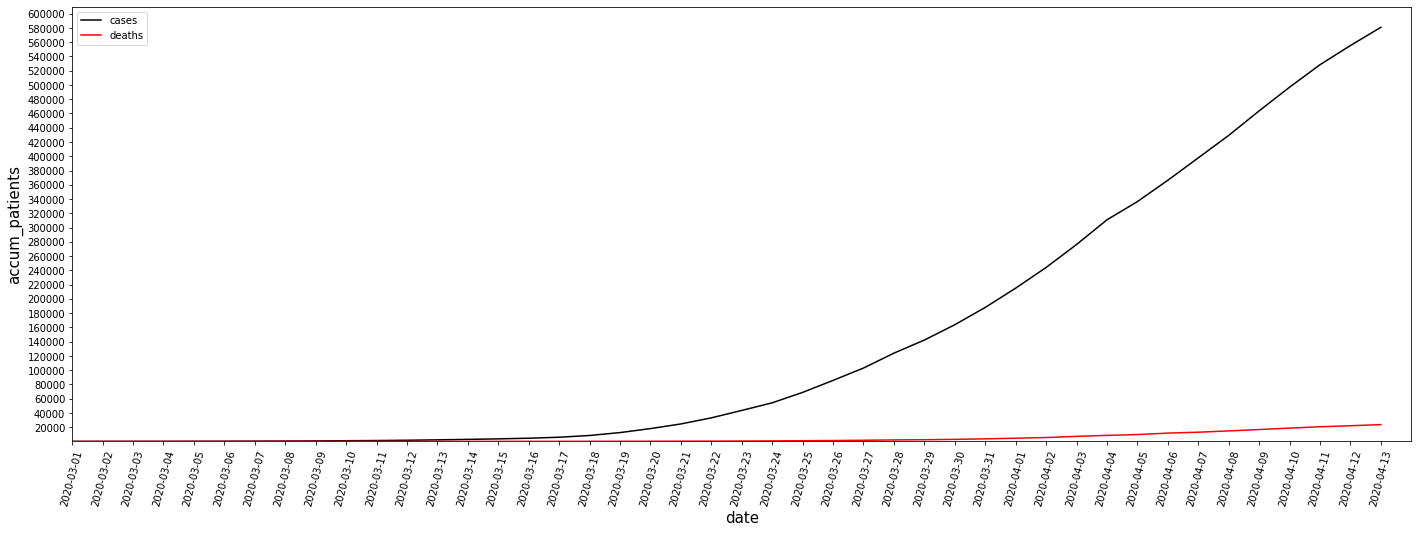

The max cases recorded in U.S 04/13/2020 is 580919, and deaths 23609


In [37]:
#group by date,we want to compare deaths and cases by date
pd_date=us_counties.groupby(['date']).sum()
pd_date=pd_date.drop(columns=['fips'])
fig=plt.figure(figsize=(24,8))
ax=fig.add_subplot(1,1,1)
ax.plot(pd_date.index,pd_date['cases'],color='black')
ax.plot(pd_date.index,pd_date['deaths'],color='red')
ax.set_xticks(pd_date.index)
ax.set_xticklabels(pd_date.index,rotation=75)
plt.ylim(10)
plt.xlim(40,84)
plt.xlabel('date',fontsize=15)
plt.ylabel('accum_patients',fontsize=15)
plt.legend(['cases','deaths'],loc='best')
ax.yaxis.set_major_locator(ticker.MultipleLocator(20000))
plt.show()
print('The max cases recorded in U.S 04/13/2020 is {}, and deaths {}'.format(pd_date['cases'].max(),pd_date['deaths'].max()))

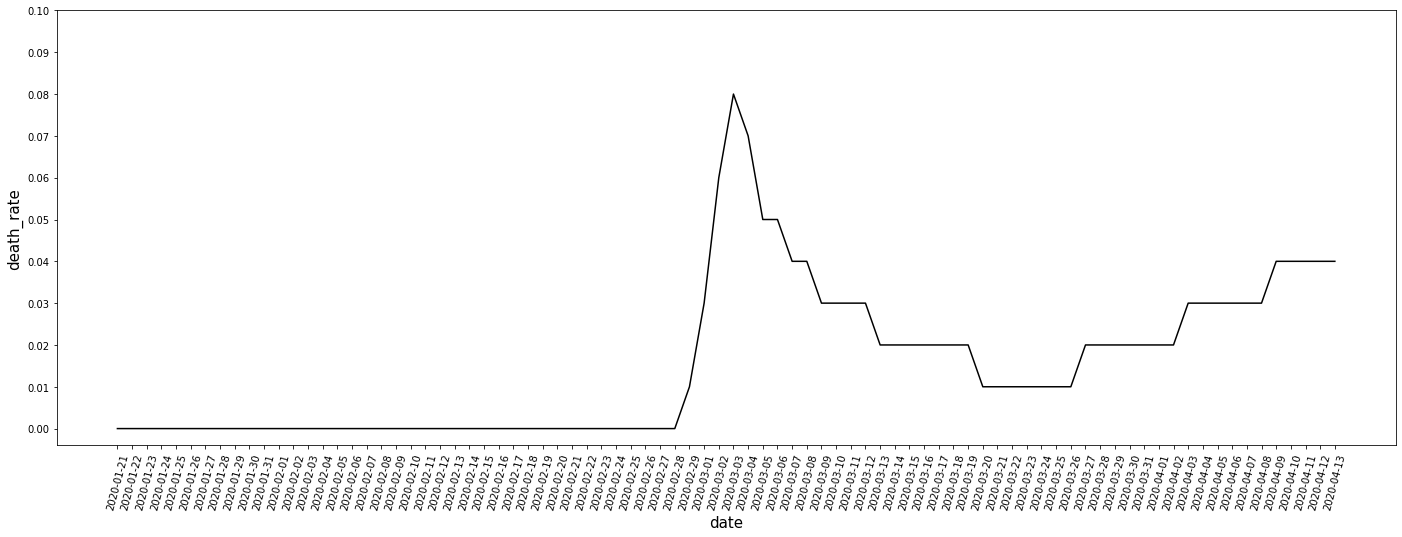

In [38]:
rate=round(pd_date['deaths']/pd_date['cases'],2)
fig = plt.figure(figsize=(24,8))
ax = fig.add_subplot(1, 1, 1)

ax.plot(rate.index, rate.values,color='black')

ax.set_xticks(rate.index)
ax.set_yticks(np.linspace(0, 0.1, 11))
ax.set_xticklabels(rate.index, rotation=75)

plt.xlabel('date',fontsize=15)
plt.ylabel('death_rate',fontsize=15)

plt.show()

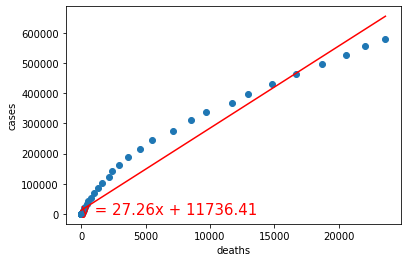

The r-squared is: 0.9624768669412478


In [27]:
x_values = pd_date['deaths']
y_values = pd_date['cases']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('deaths')
plt.ylabel('cases')
plt.show()
print(f"The r-squared is: {rvalue**2}")

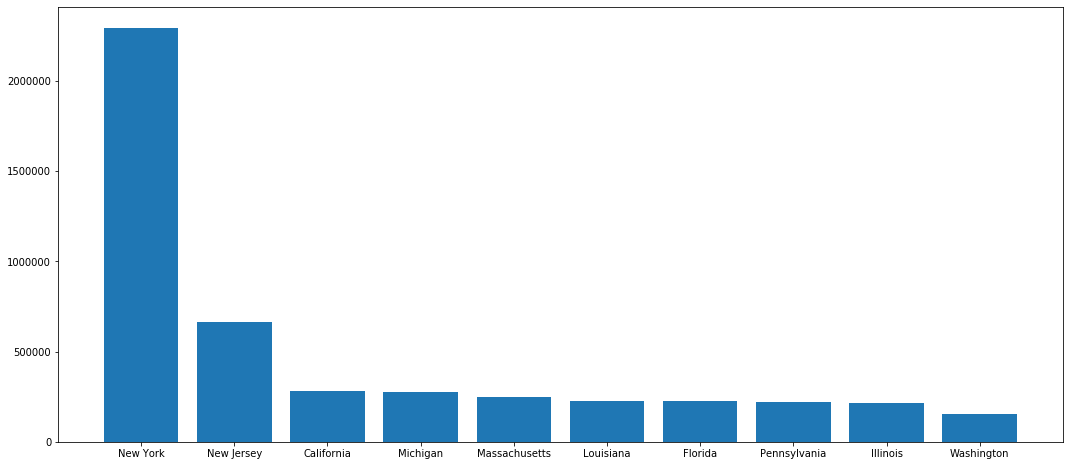

In [28]:
# Here is the top 10 states where covid-19 has most seen
df_hist = us_counties.groupby(['state']).sum().sort_values(by=['cases'],ascending=False).head(10)
#df_hist.cases.plot(kind = 'hist',figsize = (12,12))
f, ax = plt.subplots(figsize=(18,8)) 
plt.bar(df_hist.index, df_hist.cases)
plt.show()

In [29]:
#check counties for specific state
df_IL = us_counties.loc[us_counties['state']=='Illinois']
df_IL.groupby(["date","county"]).sum()
ratio =[df_IL['deaths']/df_IL['cases']]
df_IL['death_ratio'] = df_IL['deaths']/df_IL['cases']

C:\Users\14023\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


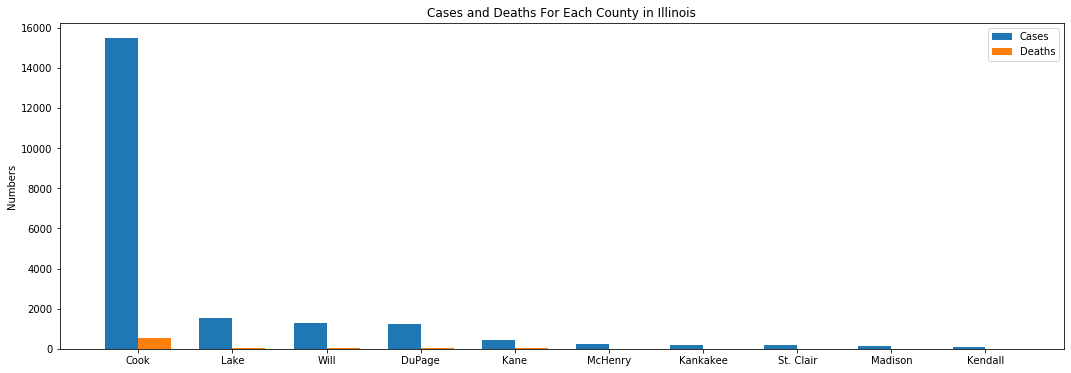

,date,county,state,fips,cases,deaths,death_ratio
54413,2020-04-13,Cook,Illinois,17031.0,15474,543,0.035091
54442,2020-04-13,Lake,Illinois,17097.0,1516,45,0.029683
54486,2020-04-13,Will,Illinois,17197.0,1283,63,0.049104
54419,2020-04-13,DuPage,Illinois,17043.0,1223,56,0.045789
54437,2020-04-13,Kane,Illinois,17089.0,421,24,0.057007
54455,2020-04-13,McHenry,Illinois,17111.0,245,7,0.028571
54438,2020-04-13,Kankakee,Illinois,17091.0,210,10,0.047619
54476,2020-04-13,St. Clair,Illinois,17163.0,202,8,0.039604
54449,2020-04-13,Madison,Illinois,17119.0,115,2,0.017391
54439,2020-04-13,Kendall,Illinois,17093.0,114,2,0.017544


In [39]:
#check for last day update
lastDay = df_IL[df_IL['date'] == max(df_IL['date'])].sort_values(by=['cases'],ascending=False).head(10)
fig, ax = plt.subplots(figsize=(18,6))
x = np.arange(len(lastDay['cases']))  # the label locations
width = 0.35
rects1 = ax.bar(x - width/2, lastDay['cases'], width, label='Cases')
rects2 = ax.bar(x + width/2, lastDay['deaths'], width, label='Deaths')
ax.set_ylabel('Numbers')
ax.set_title('Cases and Deaths For Each County in Illinois')
ax.set_xticks(x)
ax.set_xticklabels(lastDay['county'])
ax.legend()
plt.show()
lastDay

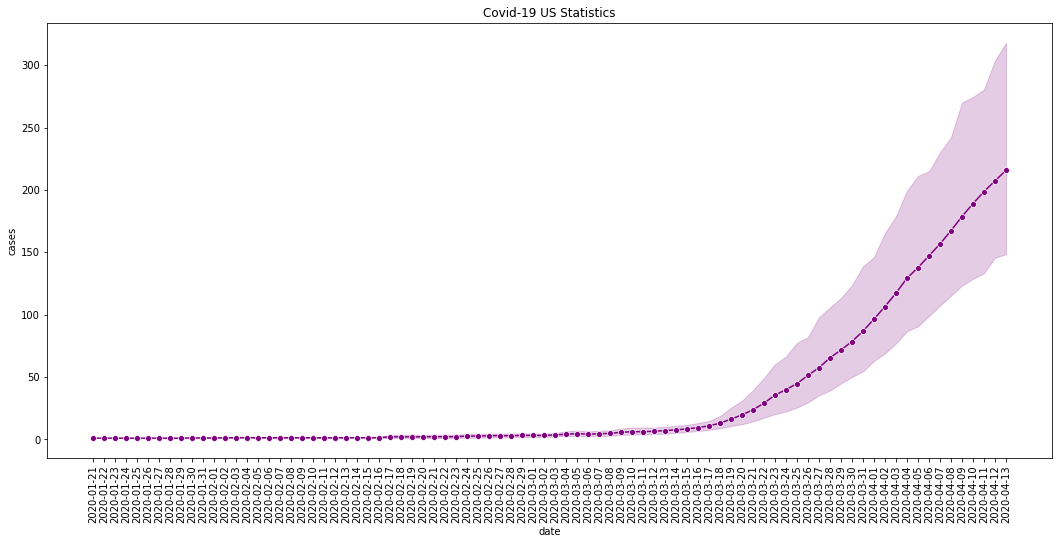

In [32]:
plt.figure(figsize=(18,8))
sns.lineplot(x='date',y='cases',data=us_counties,marker='o',color='purple')
plt.title('Covid-19 US Statistics')
plt.xticks(us_counties.date.unique(),rotation=90)
plt.show()

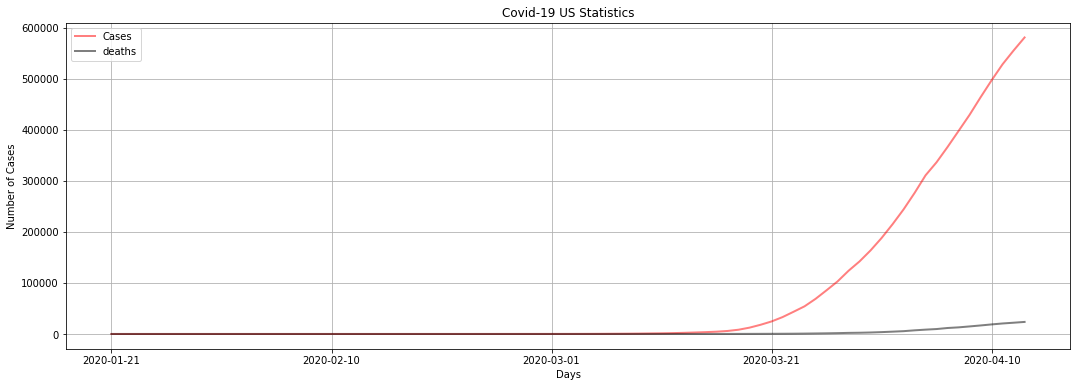

In [33]:
pd_date.cases.plot(kind='line',color='red',label='Cases',linewidth=2,
                    alpha=0.5,grid=True,linestyle='-',figsize=(18,6))
pd_date.deaths.plot(kind='line',color='black',label='deaths',linewidth=2,
                    alpha=0.5,grid=True,linestyle='-',figsize=(18,6))
plt.legend(loc='best')
plt.xlabel('Days')
plt.ylabel('Number of Cases')
plt.title('Covid-19 US Statistics')
plt.show()
